### Ookla Internet Speeds
Internet test results. For some reason all the markers are shapefile polygons, squares of a uniform size, for some reason?

#### Notes:
- I need to represent density, chlororpleth maps would be nice
- I want the average values for each feature, basically in a quadrant by quadrant chloropleth map

### TODO:
- clustering out and replotting
- folium heatmap
- median speeds and latency in major area? using the shapefiles from boundaries?
- Folium Chloropleth map?
- Clustering algorithms?
- is there enough data to determine if someone is underserved?

In [91]:
import geopandas as gpd
import pandas as pd

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [92]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [2]:
ls ../data/ookla

AB_ookla_data_2020.cpg  AB_ookla_data_2020.prj  AB_ookla_data_2020.shx
AB_ookla_data_2020.dbf  AB_ookla_data_2020.shp


In [17]:
gdf = gpd.read_file("../data/ookla/AB_ookla_data_2020.shp")

In [4]:
gdf.shape

(122047, 9)

In [9]:
gdf.head()

quadkey  avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  devices  \
0  0212113033010133         807         273          84      1        1   
1  0212113123020220       82062       11294          19     34        4   
2  0212131212333013        9741        1382          24      7        2   
3  0213002023012223       81989       39432          13     56        7   
4  0212113301112020        4405        2300          37      3        1   

  quarter conn_type                                           geometry  
0      Q1     fixed  POLYGON ((-114.13147 53.53051, -114.12598 53.5...  
1      Q1     fixed  POLYGON ((-113.55469 53.46843, -113.54919 53.4...  
2      Q1     fixed  POLYGON ((-114.28528 51.20344, -114.27979 51.2...  
3      Q1     fixed  POLYGON ((-112.05505 53.49131, -112.04956 53.4...  
4      Q1     fixed  POLYGON ((-113.29102 53.29806, -113.28552 53.2...

In [34]:
# replace polygons with

In [6]:
gdf["quadkey"].value_counts().shape

(47763,)

In [7]:
gdf.shape

(122047, 9)

In [45]:
gpd.sjoin?

### K-n Clustering
- its very hard to tell what the clustering is on

In [78]:
gdf["long"] = gdf.geometry.apply(lambda x:x.centroid.x)

In [79]:
gdf["lat"] = gdf.geometry.apply(lambda x:x.centroid.y)

In [80]:
gdf[["long", "lat"]].head()

long        lat
0 -114.128723  53.528881
1 -113.551941  53.466796
2 -114.282532  51.201721
3 -112.052307  53.489680
4 -113.288269  53.296414

In [82]:
df = pd.DataFrame(gdf[["avg_d_kbps", "long", "lat"]]); df.head()

avg_d_kbps        long        lat
0         807 -114.128723  53.528881
1       82062 -113.551941  53.466796
2        9741 -114.282532  51.201721
3       81989 -112.052307  53.489680
4        4405 -113.288269  53.296414

In [84]:
X = df.copy()

In [85]:
kmeans = KMeans(n_clusters=6)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

avg_d_kbps        long        lat Cluster
0         807 -114.128723  53.528881       1
1       82062 -113.551941  53.466796       4
2        9741 -114.282532  51.201721       1
3       81989 -112.052307  53.489680       4
4        4405 -113.288269  53.296414       1

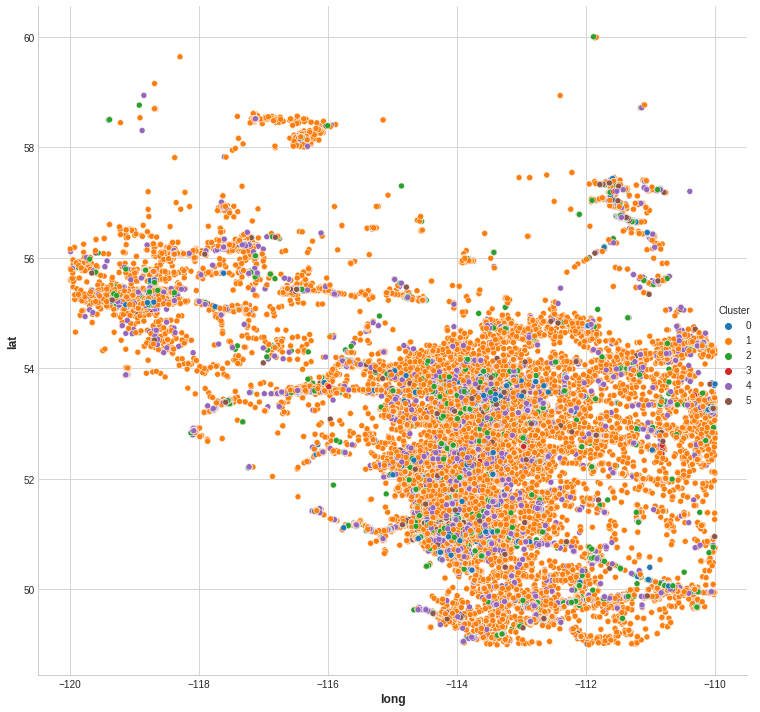

In [93]:
sns.relplot(
    x="long", y="lat", hue="Cluster", data=X, height=10,
);

In [10]:
size = (24, 30)
lwidth=2

In [11]:
df["d_quartile"] = pd.qcut(df["avg_d_kbps"], 4,
                           labels=["1st quartile", "2nd quartile", "3rd quartile", "4th quartile"])

<AxesSubplot:>

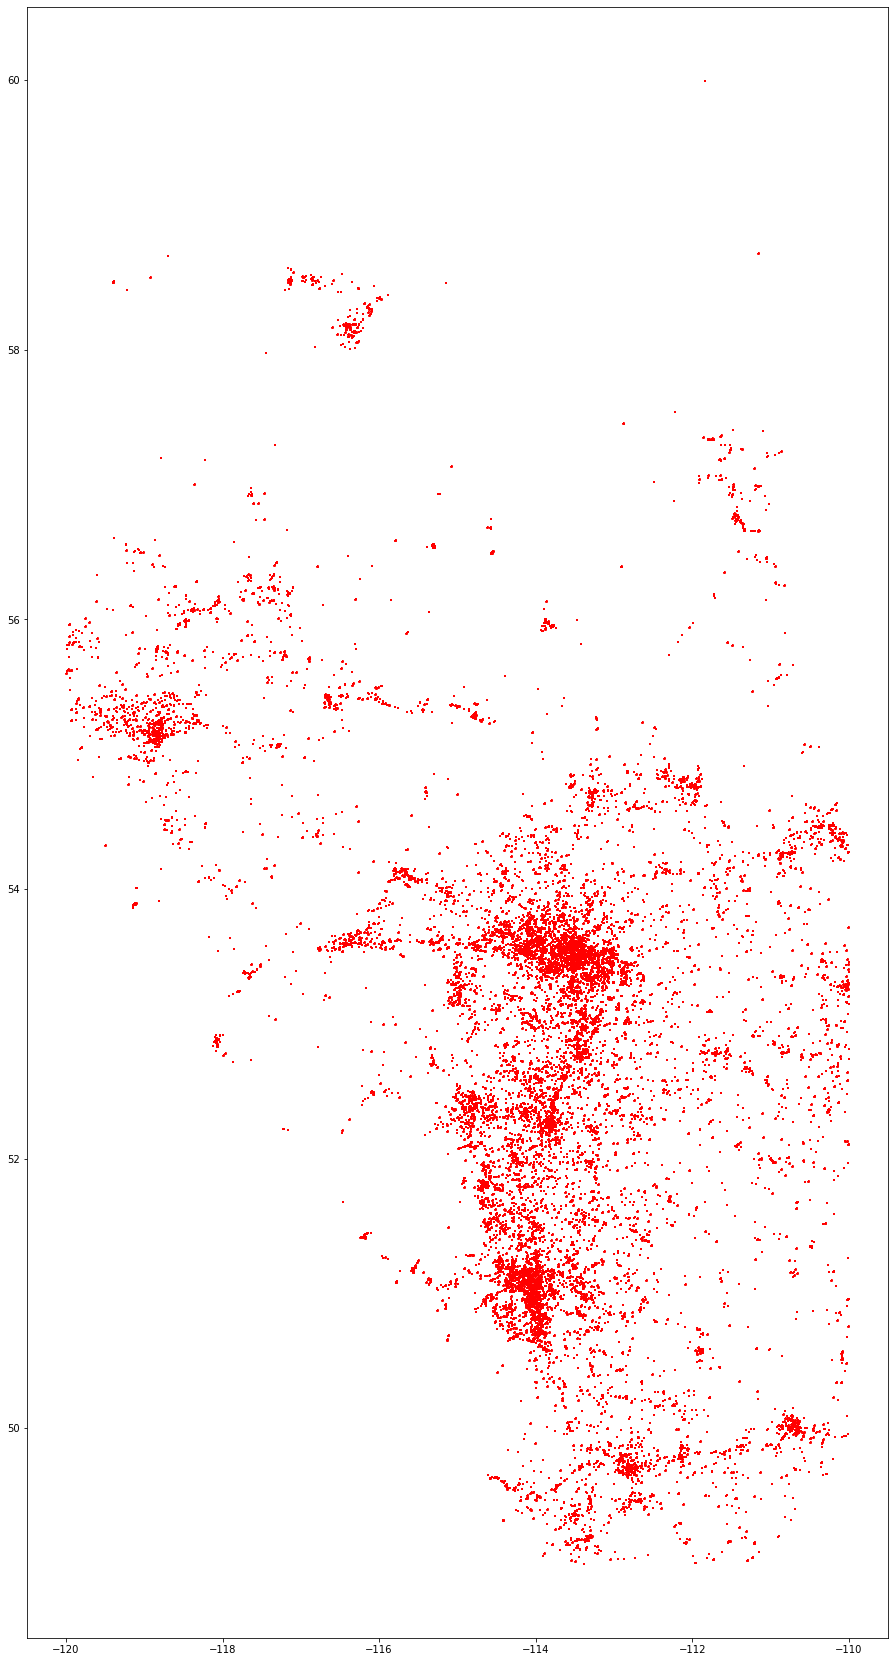

In [82]:
df[df["avg_d_kbps"] < quart2].plot(figsize=size, linewidth=lwidth, color="red", edgecolor="red")

The problem with these plots is they don't show density well

<AxesSubplot:>

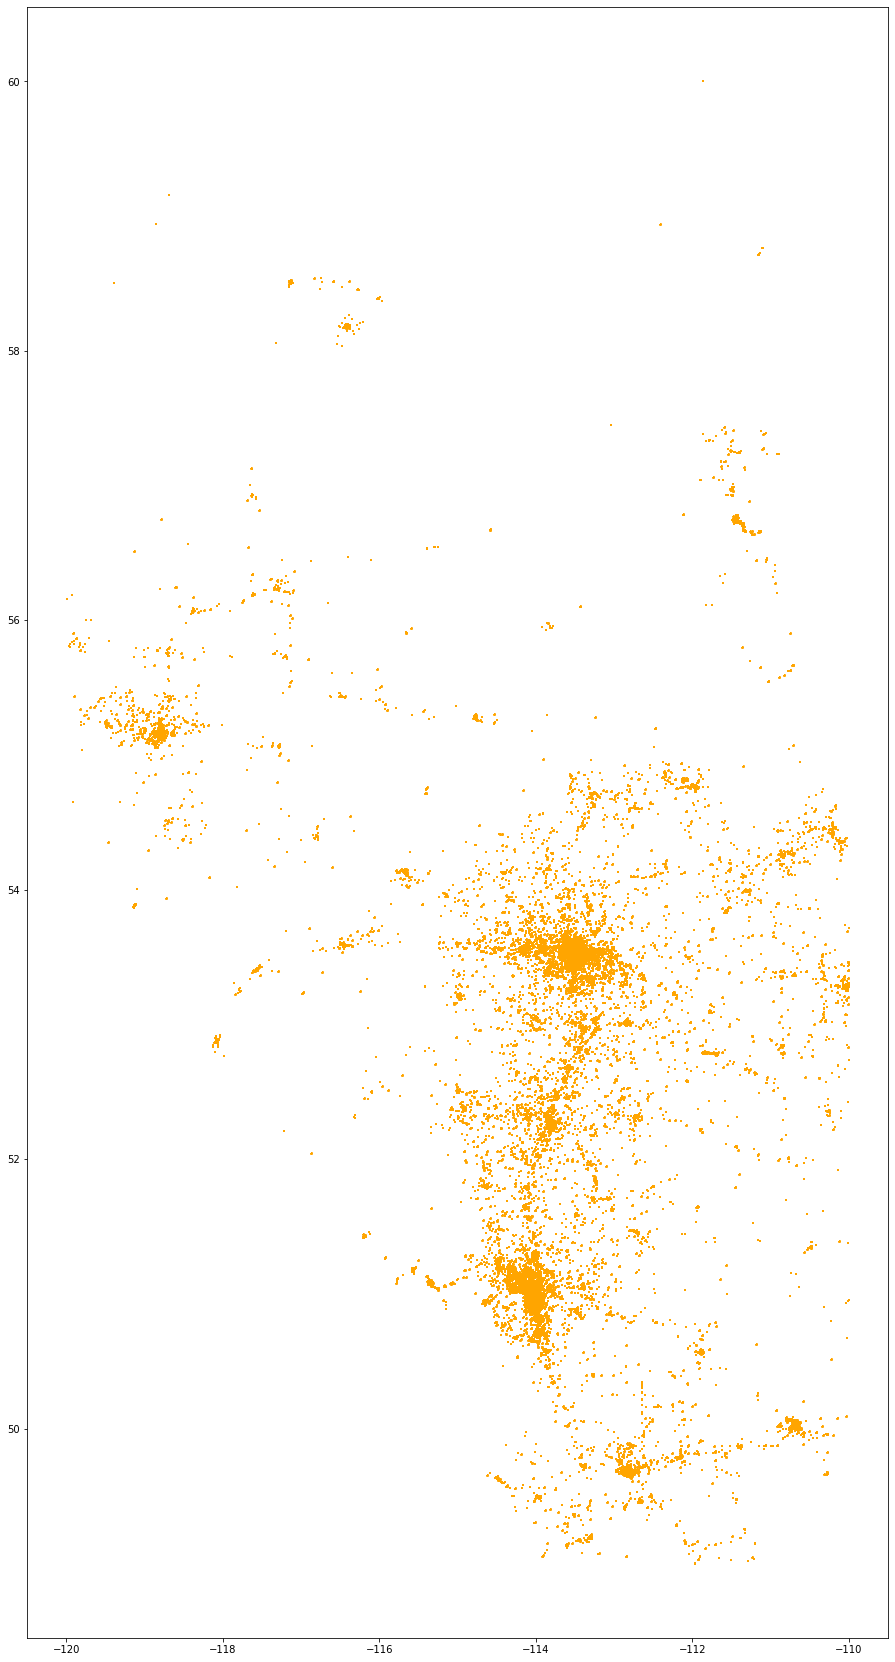

In [83]:
df[df["avg_d_kbps"].between(quart2, quart3)].plot(figsize=size, linewidth=lwidth, 
                                                  color = "orange", edgecolor="orange")

<AxesSubplot:>

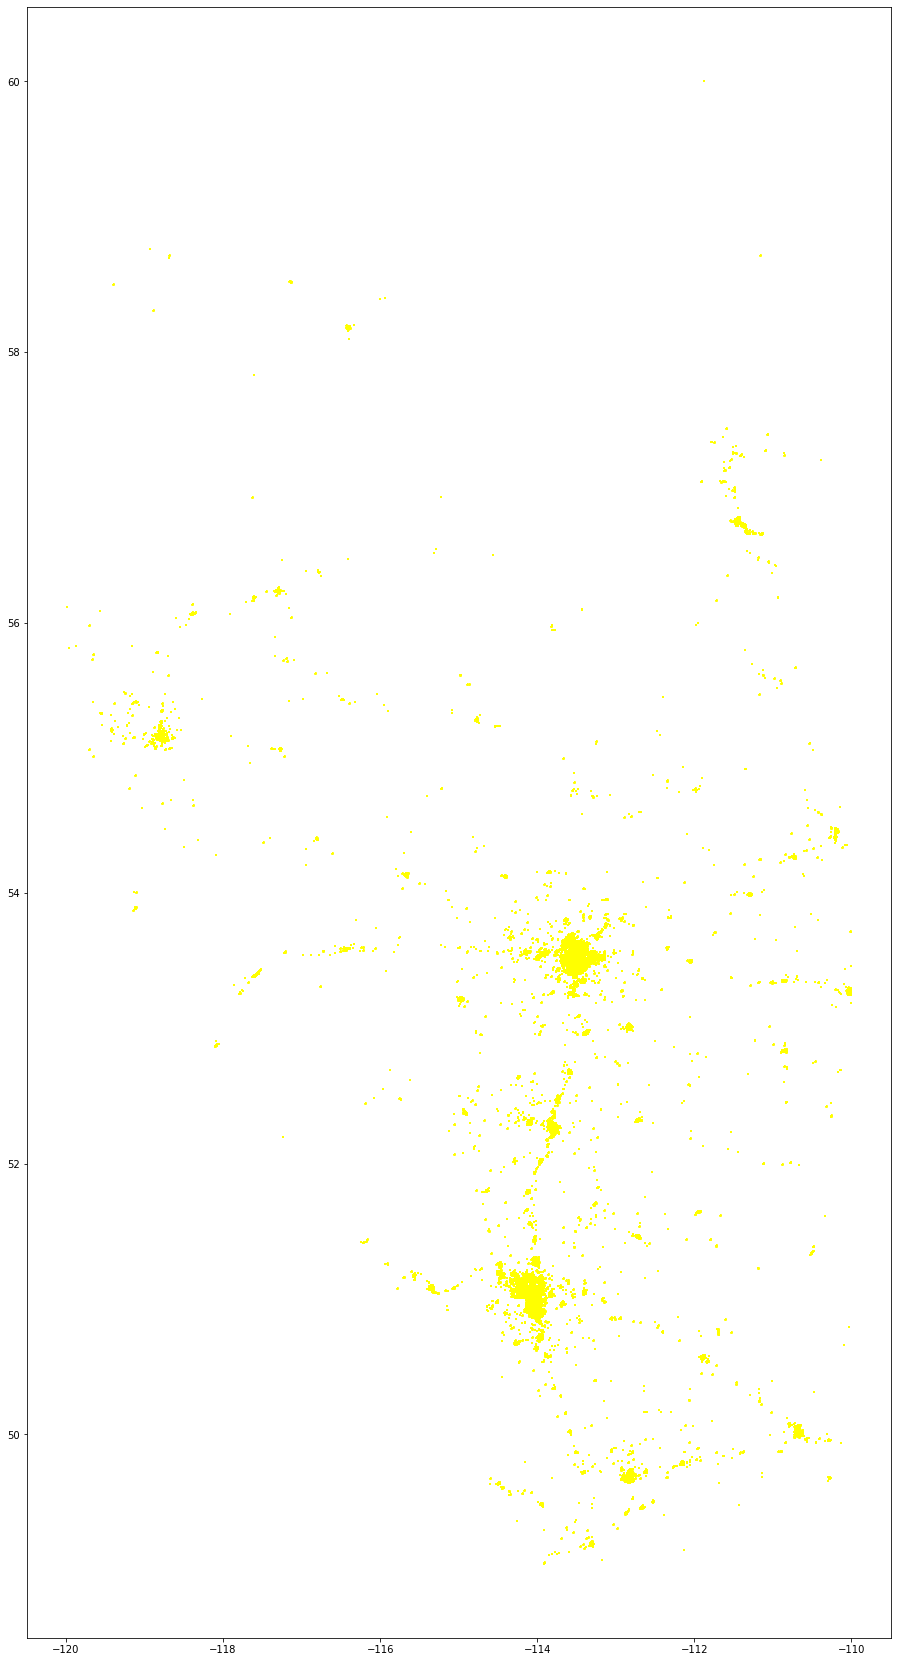

In [84]:
df[df["avg_d_kbps"].between(quart3, quart4)].plot(figsize=size,
                                                 linewidth=lwidth,
                                                 color="yellow", edgecolor="yellow")

<AxesSubplot:>

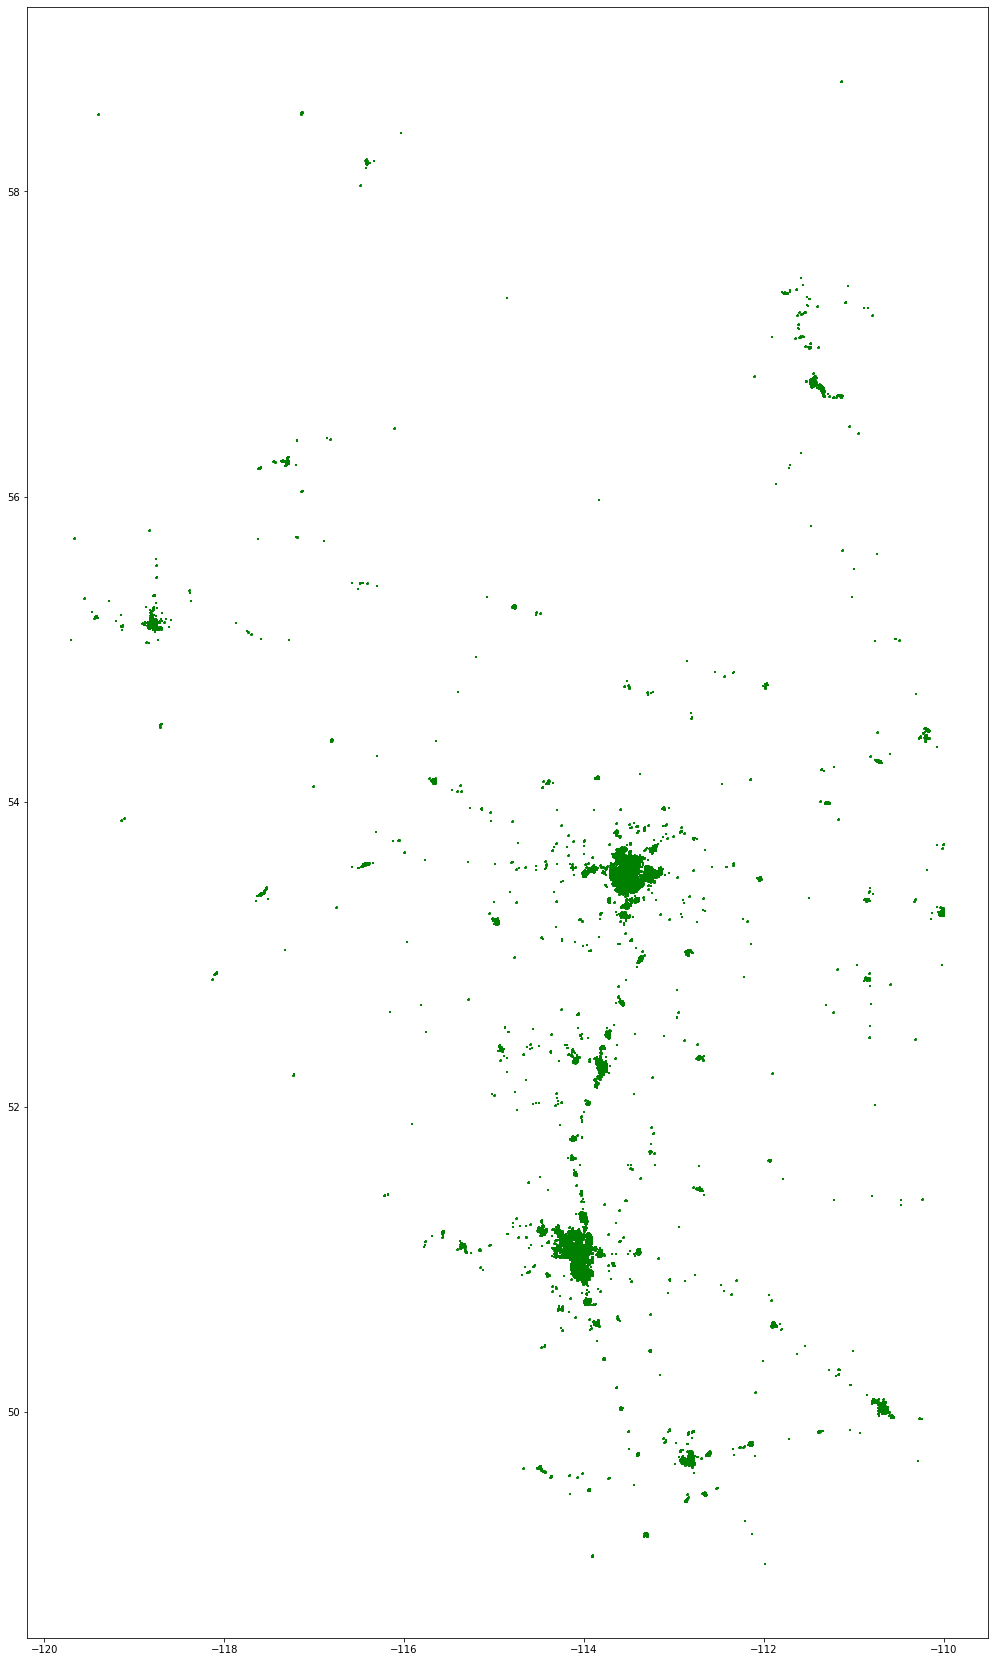

In [86]:
df[df["avg_d_kbps"] > quart4].plot(figsize=size, linewidth=lwidth, color="green",
                                   edgecolor="green", alpha=0.5)

<AxesSubplot:>

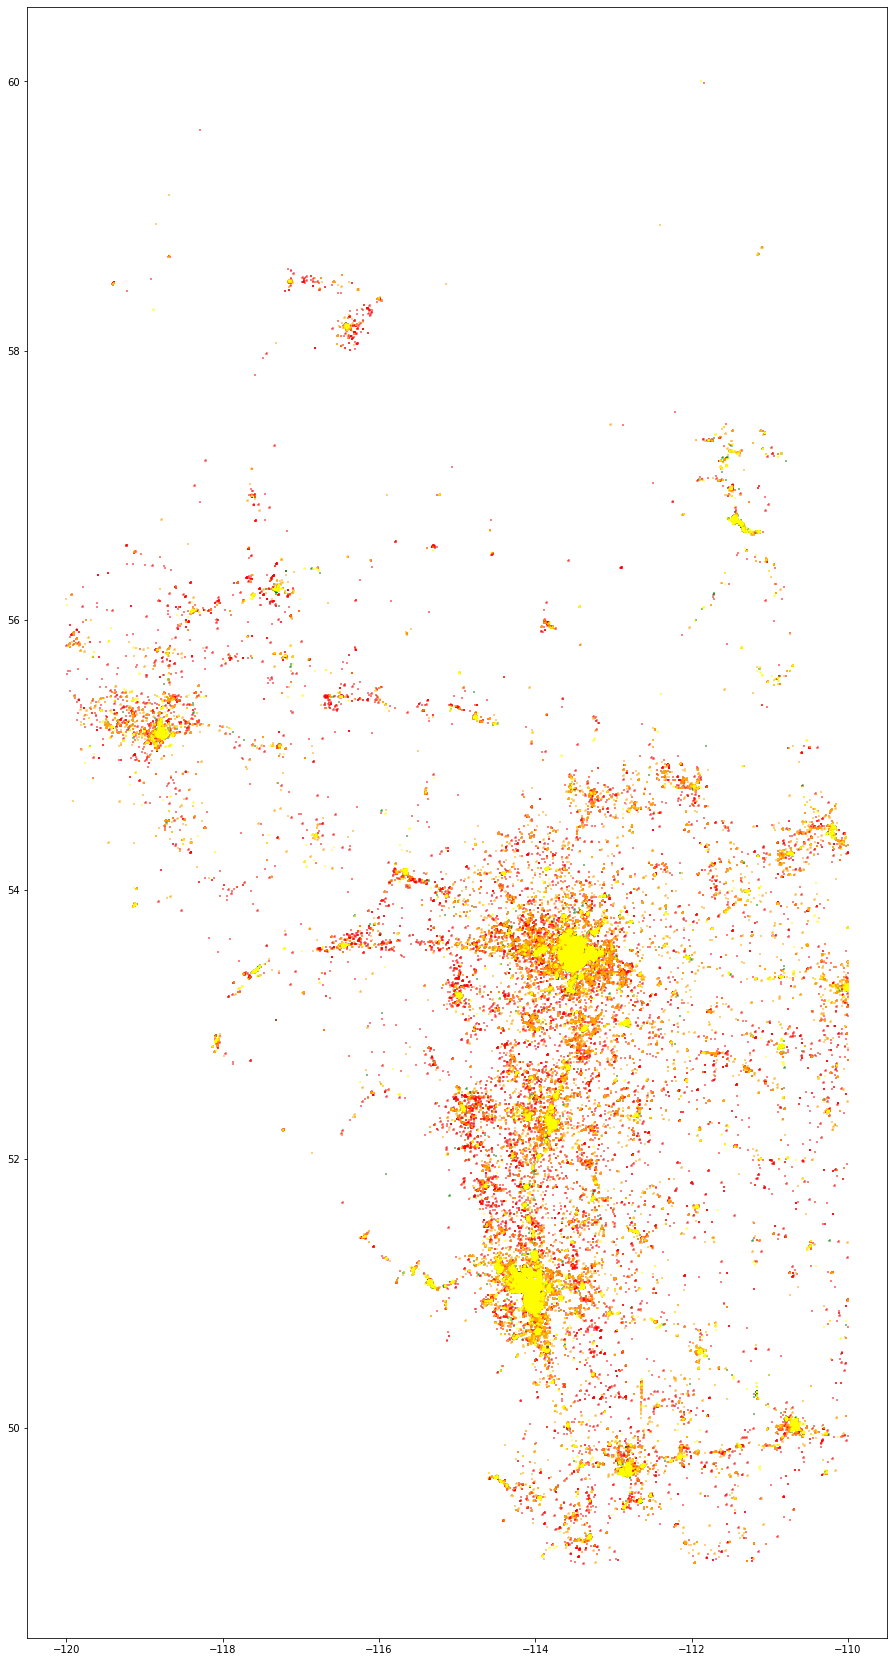

In [88]:
ax = df[df["avg_d_kbps"] > quart4].plot(figsize=size, linewidth=lwidth, color="green",
                                        edgecolor="green", alpha=0.5)

df[df["avg_d_kbps"] < quart2].plot(figsize=size, linewidth=lwidth, color="red",
                                   edgecolor="red", alpha=0.5, ax=ax)

df[df["avg_d_kbps"].between(quart2, quart3)].plot(figsize=size, linewidth=lwidth, color = "orange",
                                                  edgecolor="orange", alpha=0.5, ax=ax)
df[df["avg_d_kbps"].between(quart3, quart4)].plot(figsize=size, linewidth=lwidth, color="yellow",
                                                  edgecolor="yellow", alpha=0.5, ax=ax)

<AxesSubplot:>

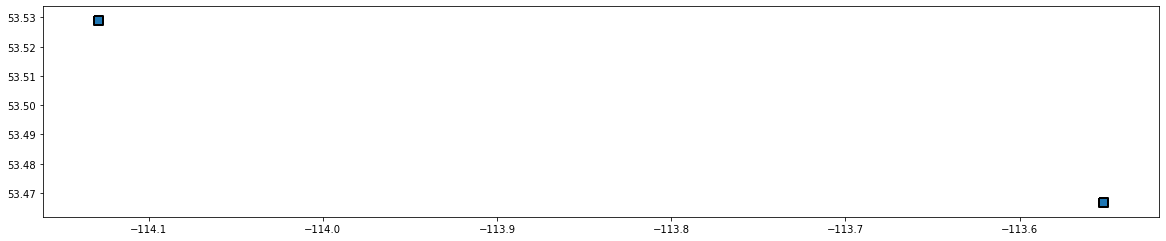

In [49]:
df.iloc[0:2].plot(figsize=(20, 24), linewidth=2, edgecolor="blue")

This is one big shapfile, so we can plot it out. Actually trying to plot out the shapefile takes at least 30 seconds. Each entry seems to be a polygon, as opposed to a marker, which is curious.

<AxesSubplot:>

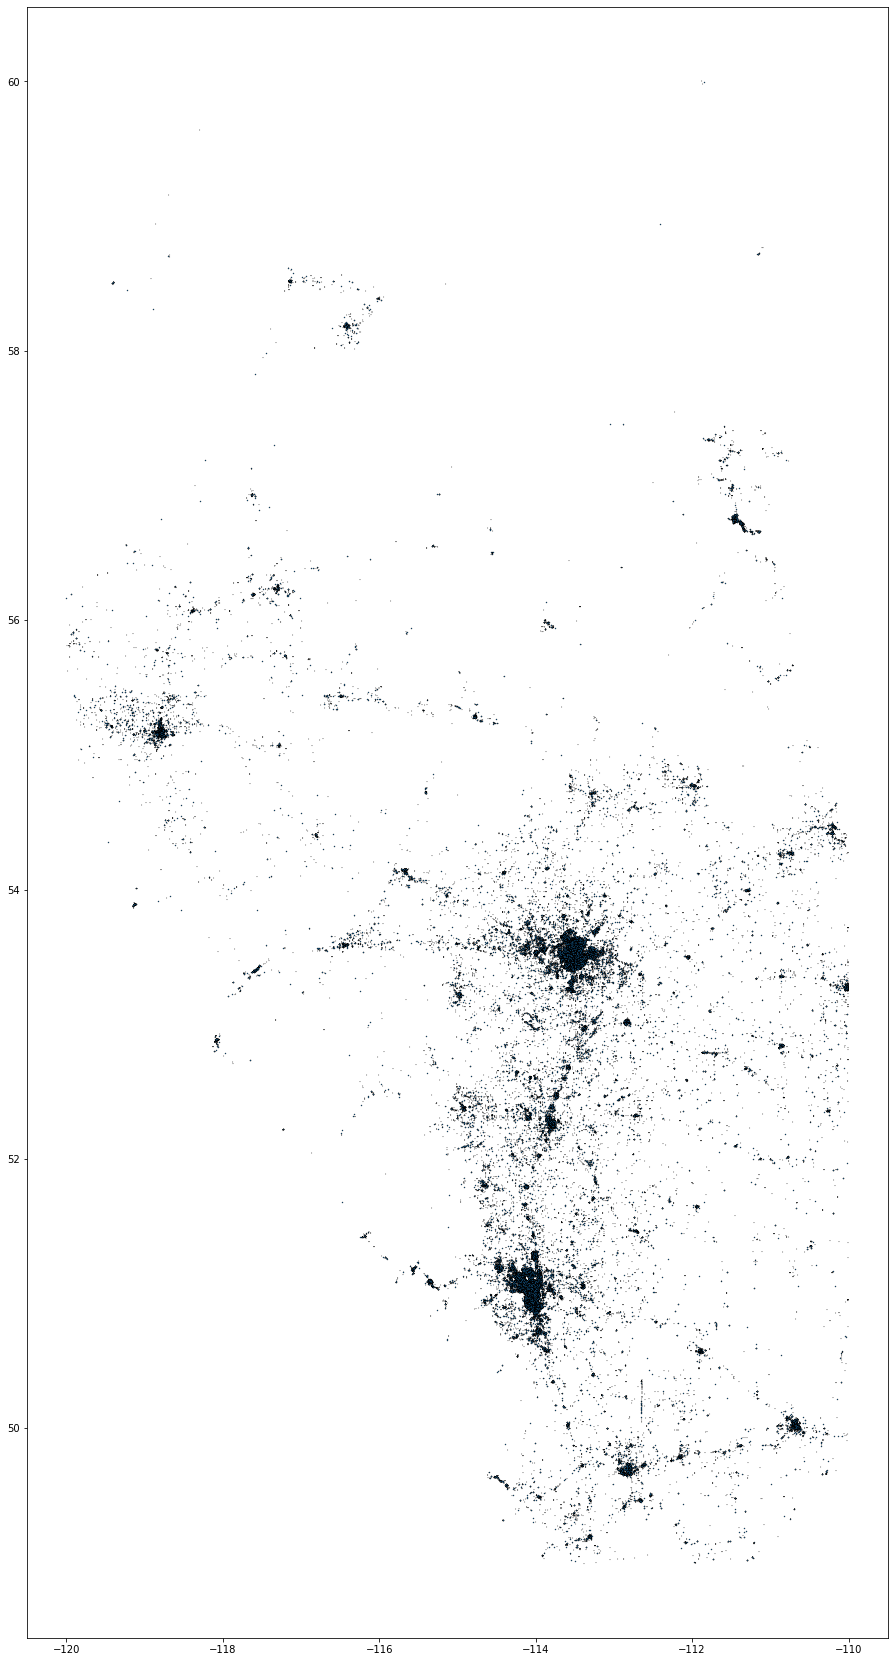

In [26]:
df.plot(figsize=(24,30), edgecolor='black', linewidth=0.25)

In [16]:
px.bar(df.nunique().sort_values())

Not as many features in this dataset. This one is also cleaned.

In [19]:
df.nunique().sort_values()

conn_type         2
quarter           4
devices          84
tests           313
avg_lat_ms      895
quadkey       47763
geometry      47763
avg_u_kbps    47888
avg_d_kbps    84476
dtype: int64

In [23]:
px.histogram(df["devices"]) # what even is this

In [22]:
px.histogram(df["quarter"])

In [21]:
# want a subplot for these
px.histogram(df["conn_type"])

In [13]:
df.isna().sum()

quadkey       0
avg_d_kbps    0
avg_u_kbps    0
avg_lat_ms    0
tests         0
devices       0
quarter       0
conn_type     0
geometry      0
dtype: int64